In [20]:
import importlib
import os, pandas as pd, numpy as np
from joblib import dump, load

import sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
import sod.core.dataset as sod_core_dataset
importlib.reload(sod_core_dataset)
import sod.core.plot as sod_plot
importlib.reload(sod_plot)
# from sod.core.dataset import open_dataset # , normalize_df
# from sod import plot

is_outlier = sod_core_dataset.is_outlier

path = os.path.join(os.getcwd(), '..', 'evaluations/results/cv.globalset.iforest.yaml/evalreports/evaluations.all.hdf')

dfr = pd.read_hdf(path)
print('evaulation dataframe.\n\nColumns:\n' + str(dfr.columns.tolist()))
print('\nclassname distinct values:\n' + str(np.unique(dfr['classname'])))

evaulation dataframe.

Columns:
['% rec.', 'Mean log_loss', 'behaviour', 'classname', 'clf', 'contamination', 'features', 'max_samples', 'n_estimators']

classname distinct values:
['ok' 'outl. (cha. resp. acc <-> vel)' 'outl. (gain X10 or X0.1)'
 'outl. (gain X100 or X0.01)' 'outl. (gain X2 or X0.5)'
 'outl. (wrong inv)' 'unlabeled (Me suspicious outl.)'
 'unlabeled (unknown)']


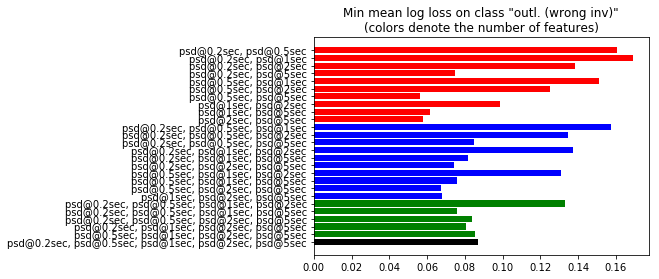

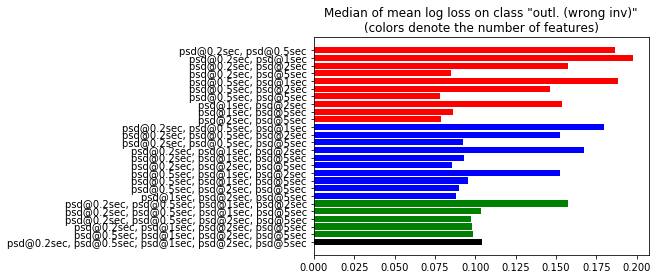

In [2]:
import matplotlib
importlib.reload(matplotlib)
import numpy as np
import matplotlib.pyplot as plt

# plt.rcParams.update({'font.size': 30})
# plt.rcParams.update({'figure.figsize': (22, 22)})

%matplotlib inline

from collections import defaultdict

class_ = 'outl. (wrong inv)'

# # printing results by number of features
# data = defaultdict(list)
# for _, df_ in dfr.groupby('features'):
#     numfeat = len(_.split(','))
#     data[numfeat].extend(_ for _ in df_[df_.classname == class_]['Mean log_loss'])

# avg = {_: np.nanmin(data[_]) for _ in data}
# plt.bar(avg.keys(), avg.values())
# plt.title('Min mean log loss on class "%s" ' % class_)
# plt.xlabel('number of features')
# plt.show()

# avg = {_: np.quantile(data[_], 0.5) for _ in data}
# plt.bar(avg.keys(), avg.values())
# plt.title('Median of mean log loss on class "%s" ' % class_)
# plt.xlabel('number of features')
# plt.show()

# print('Conclusion: TBD')
# print('')


# printing per feature with hbars (https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barh.html)
numfeat2color = {2: 'r', 3: 'b', 4:'g', 5:'k'}

data = defaultdict(list)
for _, df_ in dfr.groupby('features'):
    data[_].extend(_ for _ in df_[df_.classname == class_]['Mean log_loss'])

avg = {_: np.nanmin(data[_]) for _ in data}
labels = sorted(avg.keys(), key=lambda f: (len(f.split(',')), f), reverse=True)
colors = [numfeat2color[len(_.split(','))] for _ in labels]
ypos = np.arange(len(labels))
plt.barh(ypos, [avg[_] for _ in labels], align='center', color=colors)
plt.title('Min mean log loss on class "%s"\n(colors denote the number of features)' % class_)
plt.gca().set_yticks(ypos)
plt.gca().set_yticklabels((_.replace(",", ", ") for _ in labels))

# plt.xlabel('number of features')
# plt.xticks(rotation=90)
plt.show()

avg = {_: np.quantile(data[_], 0.5) for _ in data}
labels = sorted(avg.keys(), key=lambda f: (len(f.split(',')), f), reverse=True)
ypos = np.arange(len(labels))
plt.barh(ypos, [avg[_] for _ in labels], align='center', color=colors)
plt.title('Median of mean log loss on class "%s"\n(colors denote the number of features)' % class_)
plt.gca().set_yticks(ypos)
plt.gca().set_yticklabels((_.replace(",", ", ") for _ in labels))

# labels = sorted(avg.keys())
# ypos = np.arange(len(labels))
# plt.bar(avg.keys(), avg.values())
# plt.title('Median of mean log loss on class "%s" ' % class_)
# plt.xlabel('number of features')
# plt.xticks(rotation=90)
plt.show()

# print(pd.Series(avg))

In [3]:
# TOMORROW: download 3 models, plot contour
# download the 3 models predictions, group by station, get median and calculate log_loss + correctly classified
# see number of correctly classified per number of segment, and if there is a relation

# OUTLOOK: test on other europe db segments?
# create some other artifacts and see how it works?


In [4]:
root = os.path.abspath(os.path.join(os.getcwd(), '..', 'evaluations', 'results', 'cv.globalset.iforest.yaml'))

print(root)
assert(os.path.isdir(root))

m_path_half_5 = os.path.abspath(os.path.join(root, 'models', 'IsolationForest?features=psd@0.5sec,psd@5sec&contamination=0.1&max_samples=2048&n_estimators=100&behaviour=new.model'))
m_path_two_5  = os.path.abspath(os.path.join(root, 'models', 'IsolationForest?features=psd@2sec,psd@5sec&contamination=0.05&max_samples=512&n_estimators=100&behaviour=new.model'))
m_path_one_5  = os.path.abspath(os.path.join(root, 'models', 'IsolationForest?features=psd@1sec,psd@5sec&contamination=0.1&max_samples=2048&n_estimators=100&behaviour=new.model'))

clf_half_5 = load(m_path_half_5)
clf_one_5 = load(m_path_one_5)
clf_two_5 = load(m_path_two_5)

           
print(' class ps@0.5sec,5sec' + str(clf_half_5))
print(' class ps@1sec,5sec' + str(clf_one_5))
print(' class ps@2sec,5sec' + str(clf_two_5))
                              
                              
                              
print()

/Users/riccardo/work/gfz/projects/sources/python/sod/sod/evaluations/results/cv.globalset.iforest.yaml
 class ps@0.5sec,5secIsolationForest(behaviour='new', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples=2048, n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)
 class ps@1sec,5secIsolationForest(behaviour='new', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples=2048, n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)
 class ps@2sec,5secIsolationForest(behaviour='new', bootstrap=False, contamination=0.05,
                max_features=1.0, max_samples=512, n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)



In [5]:
print('loading source trainset')
dataframe = sod_core_dataset.open_dataset('globalset.hdf', normalize=False, verbose=False)

loading source trainset


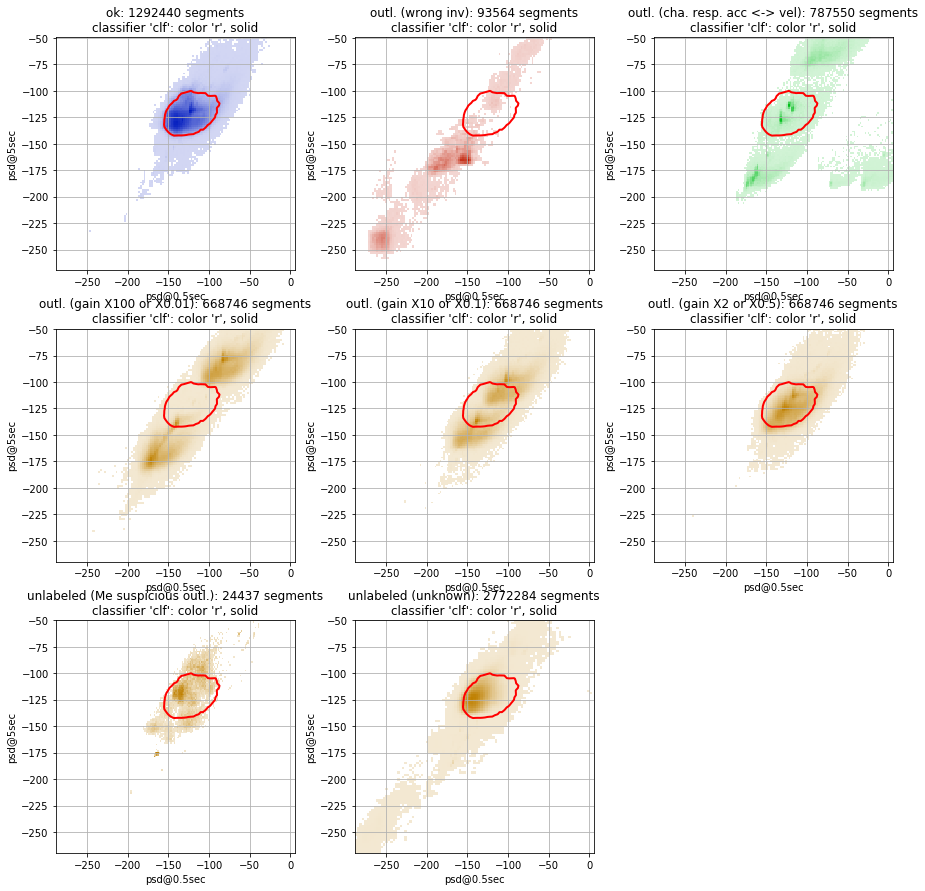

In [6]:
import importlib
import sod.core.plot as sod_plot
importlib.reload(sod_plot)

%matplotlib inline

fig = sod_plot.plot(dataframe, 'psd@0.5sec', 'psd@5sec', axis_lim=.9901, clfs={'clf': clf_half_5})

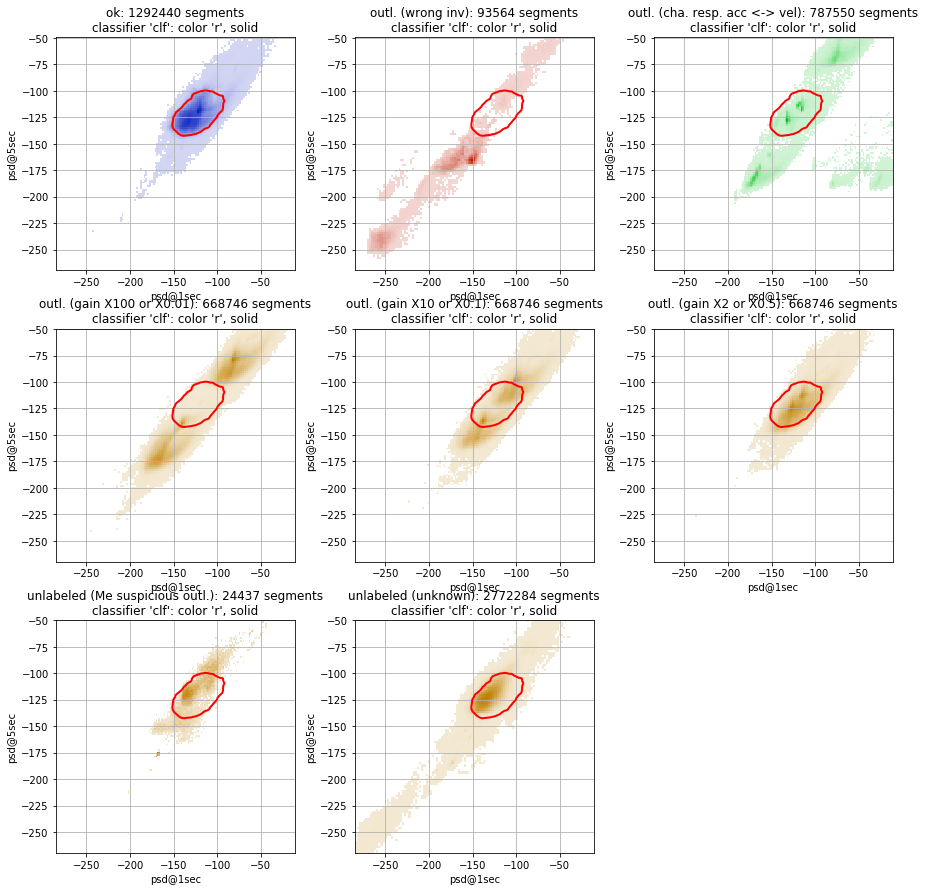

In [7]:
import importlib
import sod.core.plot as sod_plot
importlib.reload(sod_plot)

%matplotlib inline

fig = sod_plot.plot(dataframe, 'psd@1sec', 'psd@5sec', axis_lim=.9901, clfs={'clf': clf_one_5})

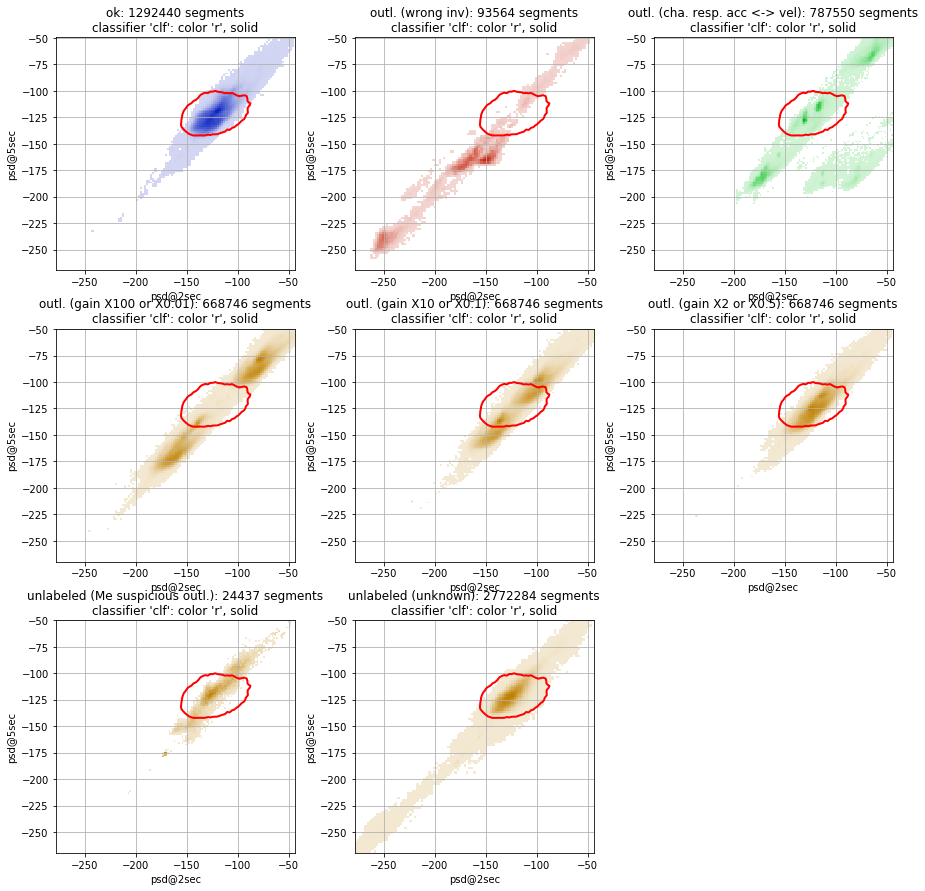

In [8]:
import importlib
import sod.core.plot as sod_plot
importlib.reload(sod_plot)

%matplotlib inline

fig = sod_plot.plot(dataframe, 'psd@2sec', 'psd@5sec', axis_lim=.9901, clfs={'clf': clf_half_5})

In [58]:
p_path_half_5 = os.path.abspath(os.path.join(root, 'predictions', 'IsolationForest?features=psd@0.5sec,psd@5sec&contamination=0.1&max_samples=2048&n_estimators=100&behaviour=new.hdf'))
p_path_two_5  = os.path.abspath(os.path.join(root, 'predictions', 'IsolationForest?features=psd@2sec,psd@5sec&contamination=0.05&max_samples=512&n_estimators=100&behaviour=new.hdf'))
p_path_one_5  = os.path.abspath(os.path.join(root, 'predictions', 'IsolationForest?features=psd@1sec,psd@5sec&contamination=0.1&max_samples=2048&n_estimators=100&behaviour=new.hdf'))

prd_half_5 = pd.read_hdf(p_path_half_5)
prd_one_5 = pd.read_hdf(p_path_one_5)
prd_two_5 = pd.read_hdf(p_path_two_5)

preds = {
    'psd@0.5sec, psd@5sec': prd_half_5,
    'psd@1sec, psd@5sec': prd_one_5,
    'psd@2sec, psd@5sec': prd_two_5
}

print(prd_half_5.columns)  # one is sufficient
print()

print(' class psd@0.5sec,5sec ' + str(len(prd_half_5)))
print(' class psd@1sec,5sec ' + str(len(prd_one_5)))
print(' class psd@2sec,5sec ' + str(len(prd_two_5)))

print()

for name, prd_df in preds.items():
    print('Predictions of %s' % str(name))
    dinfo = sod_core_dataset.dataset_info(prd_df)
    print('inliers (min, median, max):')
    _prd_df = prd_df[dinfo.class_selector[dinfo.classnames[0]]]
    print((_prd_df.decision_function.min(), _prd_df.decision_function.median(), _prd_df.decision_function.max()))
    print('outliers (min, median, max):')
    _prd_df = prd_df[dinfo.class_selector[dinfo.classnames[1]]]
    print((_prd_df.decision_function.min(), _prd_df.decision_function.median(), _prd_df.decision_function.max()))
    print()

Index(['globalset.id', 'correctly_predicted', 'log_loss', 'decision_function',
       'outlier', 'subclass', 'window_type'],
      dtype='object')

 class psd@0.5sec,5sec 5258077
 class psd@1sec,5sec 5258054
 class psd@2sec,5sec 5258051

Predictions of psd@0.5,5
inliers (min, median, max):
(-0.35693947774039203, 0.07255932122838979, 0.10972665377052404)
outliers (min, median, max):
(-0.3460104025237925, -0.2998335126365414, 0.09612788974091535)

Predictions of psd@1,5
inliers (min, median, max):
(-0.360264531717579, 0.0761810311872993, 0.1146588595147277)
outliers (min, median, max):
(-0.3421204421339581, -0.2857683561822104, 0.10527544043518472)

Predictions of psd@2,5
inliers (min, median, max):
(-0.2788989852545458, 0.1238360942038571, 0.17313260742277942)
outliers (min, median, max):
(-0.2761437077666714, -0.24214942397151085, 0.14810070076502185)



In [60]:
colz = ['globalset.id', 'subclass', 'window_type', 'outlier']
for name, pred_df in dict(preds).items():
    # https://stackoverflow.com/a/22720823
    dfr__ = dataframe.drop_duplicates(subset=colz)
    pred2 = pred_df.merge(dfr__, how='left', on=colz)
    print(pred2.columns)
    pred2['channel_code'] = pred2['channel_code'].astype('category')
    pred2['cha_id'] = pred2['channel_code'].str[:2]
    assert len(pred2) == len(pred_df)
    preds[name] = pred2
    # print(pred2.columns)


Index(['globalset.id', 'correctly_predicted', 'log_loss', 'decision_function',
       'outlier', 'subclass', 'window_type', 'dataset_id', 'psd@0.05sec',
       'psd@0.1sec', 'psd@0.2sec', 'psd@0.5sec', 'psd@1sec', 'psd@2sec',
       'psd@3sec', 'psd@5sec', 'psd@9sec', 'amplitude_ratio', 'event_id',
       'station_id', 'event_time', 'channel_code', 'magnitude', 'distance_km'],
      dtype='object')
Index(['globalset.id', 'correctly_predicted', 'log_loss', 'decision_function',
       'outlier', 'subclass', 'window_type', 'dataset_id', 'psd@0.05sec',
       'psd@0.1sec', 'psd@0.2sec', 'psd@0.5sec', 'psd@1sec', 'psd@2sec',
       'psd@3sec', 'psd@5sec', 'psd@9sec', 'amplitude_ratio', 'event_id',
       'station_id', 'event_time', 'channel_code', 'magnitude', 'distance_km'],
      dtype='object')
Index(['globalset.id', 'correctly_predicted', 'log_loss', 'decision_function',
       'outlier', 'subclass', 'window_type', 'dataset_id', 'psd@0.05sec',
       'psd@0.1sec', 'psd@0.2sec', 'psd@0.5

In [98]:
import pandas as pd, numpy as np
import sod.core.evaluation as sod_core_eval
importlib.reload(sod_core_eval)
normalize = sod_core_eval.normalize

dinfo = sod_core_dataset.dataset_info(dataframe)
classnames = dinfo.classnames[:2] + dinfo.classnames[-2:]
colz = ['cha_id', 'dataset_id', 'station_id']

print('Confusion matrices where each instance is a distinct channel (grouping segment of the same orientation)')
print('The prediction is taken as the MEDIAN of the predictions for all channel\'s segments')
print('Notes: c.as.= "classified as"')
print('       The score below is a real number from 0=inlier to 1=outlier')
print('')
for name, pred_df in dict(preds).items():
    print()
    print(name)
    data = {'c.as.inlier': [], 'c.as.outlier': [], 'c.as.inlier mean score': [], 'c.as.outlier mean score': []}
    index = []
    wrongs = []
    max_i = pred_df[~pred_df['outlier']]['decision_function'].max()
    min_o = pred_df[pred_df['outlier']]['decision_function'].min()
    # max_o = -pred_df_o['decision_function'].min()
    # max_o, max_o = pred_df_i['decision_function'].min(), pred_df_i['decision_function'].max()
    for cname in classnames:
        csel = dinfo.class_selector[cname]
        dtmp = pred_df[csel(pred_df)]
        inlier, outlier = 0, 0 
        mean_score_i, mean_score_o = [], []  # inlier, outlier
        for (cha_id, d_id, s_id), d in dtmp.groupby(colz):
            val = d['decision_function'].median()
            # negatives are outliers
            if val < 0:  # classified as outlier
                outlier += 1
                mean_score_o.append(val)
            elif val > 0:
                inlier += 1
                mean_score_i.append(val)
            else:
                outlier += 0.5
                inlier += 0.5
        data['c.as.inlier'].append(inlier)
        data['c.as.outlier'].append(outlier)
        data['c.as.inlier mean score'].append(np.around(np.nanmean((normalize(np.array(mean_score_i), min_o, max_i)-1)/-2), 3))
        data['c.as.outlier mean score'].append(np.around(np.nanmean((normalize(np.array(mean_score_o), min_o, max_i)-1)/-2), 3))

    print(pd.DataFrame(index=classnames, data=data).to_string())
            

Confusion matrices where each instance is a distinct channel (grouping segment of the same orientation)
The prediction is taken as the MEDIAN of the predictions for all channel's segments
Notes: c.as.= "classified as"
       The score below is a real number from 0=inlier to 1=outlier


psd@0.5,5
                                 c.as.inlier  c.as.outlier  c.as.inlier mean score  c.as.outlier mean score
ok                                       565            16                   0.184                    0.637
outl. (wrong inv)                          1            56                   0.227                    0.919
unlabeled (Me suspicious outl.)            9             8                   0.226                    0.626
unlabeled (unknown)                     2154           130                   0.194                    0.768

psd@1,5
                                 c.as.inlier  c.as.outlier  c.as.inlier mean score  c.as.outlier mean score
ok                                       567  

In [105]:
import pandas as pd, numpy as np
import sod.core.evaluation as sod_core_eval
importlib.reload(sod_core_eval)
normalize = sod_core_eval.normalize

dinfo = sod_core_dataset.dataset_info(dataframe)
classnames = dinfo.classnames[:2] + dinfo.classnames[-2:]
colz = ['cha_id', 'dataset_id', 'station_id']

print('Confusion matrices where each instance is a distinct station')
print('The prediction is taken as the MEDIAN of the predictions for all channel\'s segments')
print('Notes: c.as.= "classified as"')
print('       The score below is a real number from 0=inlier to 1=outlier')
print('')
for name, pred_df in dict(preds).items():
    print()
    print(name)
    data = {'result':[], 'score':[], 'cha_id': [], 'db': [], 'sta_id': [], 'num segments': []}
    index = []
    wrongs = []
    max_i = pred_df[~pred_df['outlier']]['decision_function'].max()
    min_o = pred_df[pred_df['outlier']]['decision_function'].min()
    # max_o = -pred_df_o['decision_function'].min()
    # max_o, max_o = pred_df_i['decision_function'].min(), pred_df_i['decision_function'].max()
    for (cname, action) in zip(classnames, ['wrong', 'wrong', 'to check', 'to check']):
        csel = dinfo.class_selector[cname]
        dtmp = pred_df[csel(pred_df)]
        inlier, outlier = 0, 0 
        mean_score_i, mean_score_o = [], []  # inlier, outlier
        for (c_id, d_id, s_id), d in dtmp.groupby(colz):
            val = np.round(d['decision_function'].median(), 3)
            is_outlier = d['outlier'].values[0]
            # negatives are outliers
            if (val < 0 and not is_outlier) or (val > 0 and is_outlier):  # classified as outlier
                data['result'].append(action)
                data['score'].append(((normalize(np.array([val]), min_o, max_i)-1)/-2)[0])
                data['cha_id'].append(c_id)
                data['sta_id'].append(s_id)
                data['num segments'].append(len(d))
                data['db'].append('me' if d_id == 2 else 'europe')

    print(pd.DataFrame(data=data).to_string())
            

Confusion matrices where each instance is a distinct station
The prediction is taken as the MEDIAN of the predictions for all channel's segments
Notes: c.as.= "classified as"
       The score below is a real number from 0=inlier to 1=outlier


psd@0.5,5
       result     score cha_id      db  sta_id  num segments
0       wrong  0.716756     BH  europe    2447           138
1       wrong  0.502890     BH      me     557          1867
2       wrong  0.508670     BH      me     803          2048
3       wrong  0.547686     BH      me     836          2577
4       wrong  0.501445     BH      me    2666          1611
5       wrong  0.777448     EH  europe     512           342
6       wrong  0.544796     EH  europe   10161            42
7       wrong  0.797679     HG  europe    5860           226
8       wrong  0.761553     HG  europe    5861           100
9       wrong  0.820800     HH  europe    3633           310
10      wrong  0.783228     HH  europe    3780            36
11      wrong 

       result     score cha_id      db  sta_id  num segments
0       wrong  0.745239     BH  europe    2447           138
1       wrong  0.523356     BH      me     828            79
2       wrong  0.513138     BH      me    2660          1602
3       wrong  0.797790     EH  europe     512           342
4       wrong  0.565689     EH  europe   10161            42
5       wrong  0.813848     HG  europe    5860           226
6       wrong  0.781733     HG  europe    5861           100
7       wrong  0.856181     HH  europe    3633           310
8       wrong  0.812388     HH  europe    3780            36
9       wrong  0.568609     HH  europe    4305          1808
10      wrong  0.740860     HH  europe    4568           244
11      wrong  0.546712     HH  europe    5224            10
12      wrong  0.586126     HN  europe     960            32
13      wrong  0.584666     HN  europe    4762          2178
14      wrong  0.242715     BH      me    3258           712
15   to check  0.129335 

       result     score cha_id      db  sta_id  num segments
0       wrong  0.800568     BH  europe    2447           138
1       wrong  0.816864     EH  europe     512           342
2       wrong  0.538024     EH  europe   10161            42
3       wrong  0.887479     HG  europe    5860           226
4       wrong  0.854888     HG  europe    5861           100
5       wrong  0.900154     HH  europe    3633           310
6       wrong  0.876615     HH  europe    3780            36
7       wrong  0.767976     HH  europe    4568           244
8       wrong  0.532592     HH  europe    5224            10
9       wrong  0.503621     HN  europe     676           179
10      wrong  0.570615     HN  europe     960            32
11      wrong  0.570615     HN  europe    4762          2178
12      wrong  0.190988     BH      me    3258           712
13   to check  0.141893     BH      me     434           665
14   to check  0.326722     BH      me     734          1225
15   to check  0.147669 